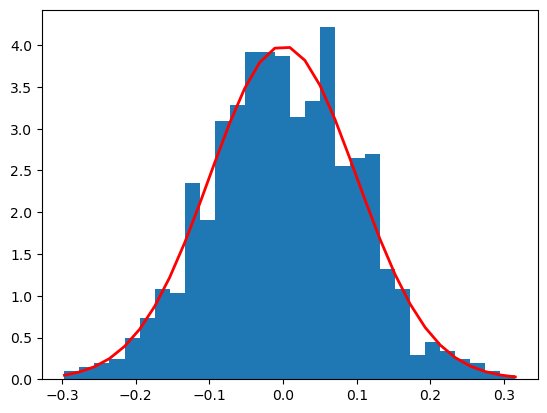

In [2]:
import numpy as np
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp(-(bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

In [3]:
# Home work 1.1: Check the Central limit Theorem by
# building two-modal distribution (like above) generating many points,
# taking samples (e.g. 100 values) and computing mean value,
# plotting distribution with mean values from many samples
import numpy as np
import seaborn as sns

population_size = 1000000
x1 = np.random.normal(-5, 2, int(population_size * 0.5))
x2 = np.random.normal(5, 3, int(population_size * 0.5))
population = np.concatenate((x1, x2))
np.random.shuffle(population)

number_of_samples = 10000
sample_means = np.random.rand(number_of_samples)

def plot_with_size(size):
    c = np.random.rand(number_of_samples)
    for i in range(0,number_of_samples):
        c = np.random.randint(1,population_size,size)
        sample_means[i] = population[c].mean()

    plt.subplot(1,2,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    sns.histplot(sample_means, kde = False)
    plt.title('Histogram of Sample mean',fontsize=20)
    plt.xlabel('Sample mean',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.subplot(1,2,2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    sns.histplot(sample_means, kde = True)
    plt.title('Density of Sample mean',fontsize=20)
    plt.xlabel('Sample mean',fontsize=20)
    plt.ylabel('Density',fontsize=20)
    plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

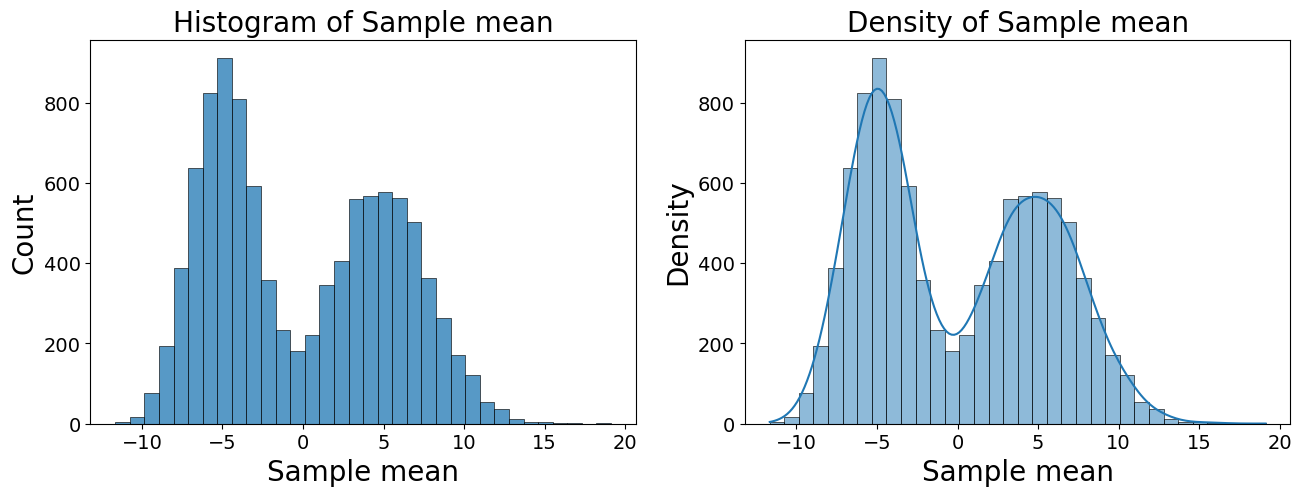

In [4]:
plot_with_size(1)

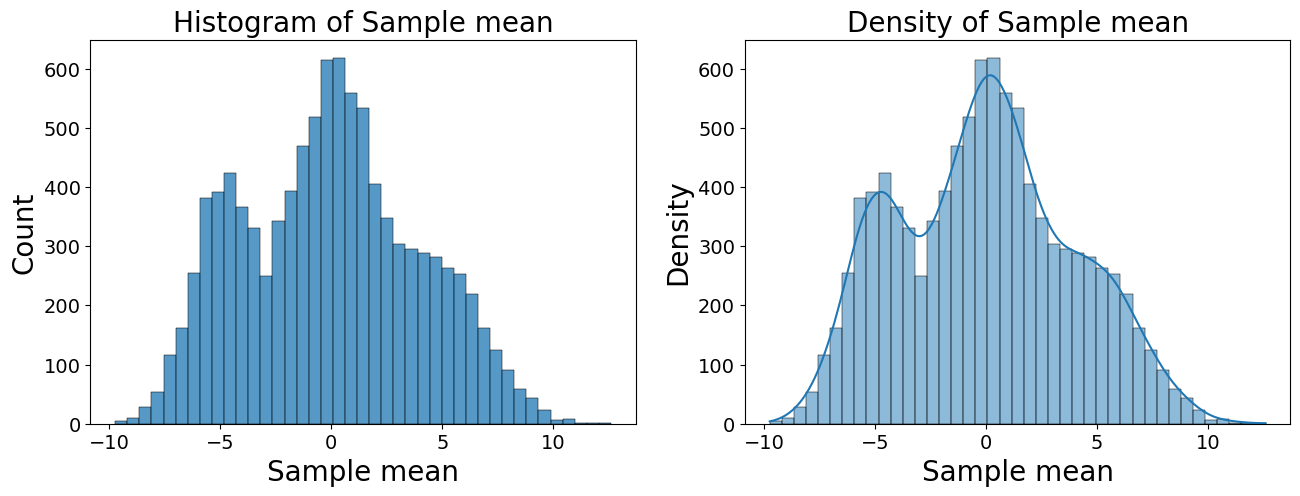

In [5]:
plot_with_size(2)

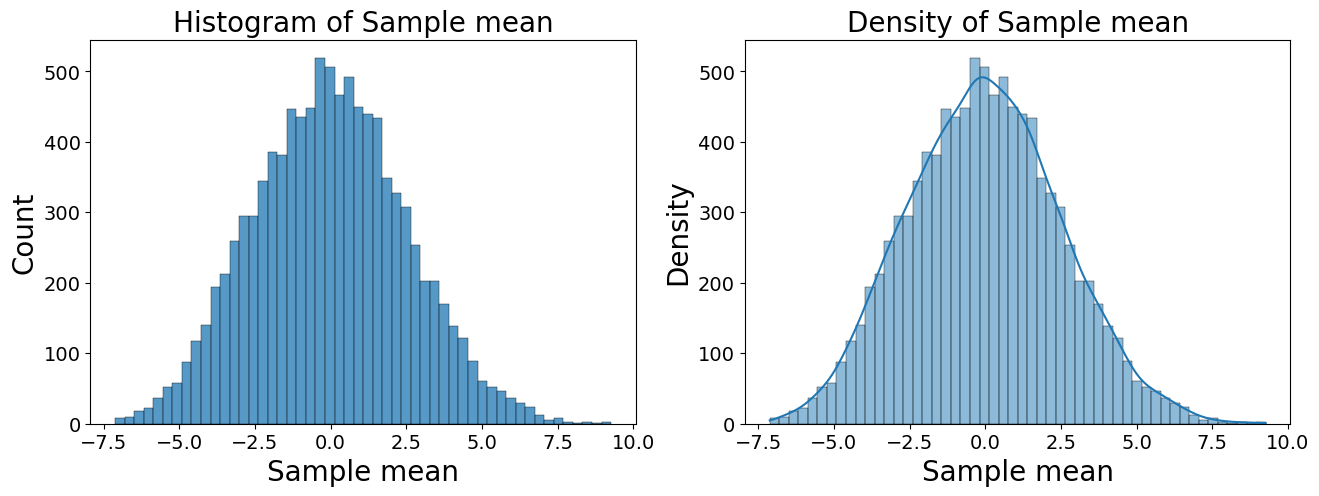

In [6]:
plot_with_size(5)

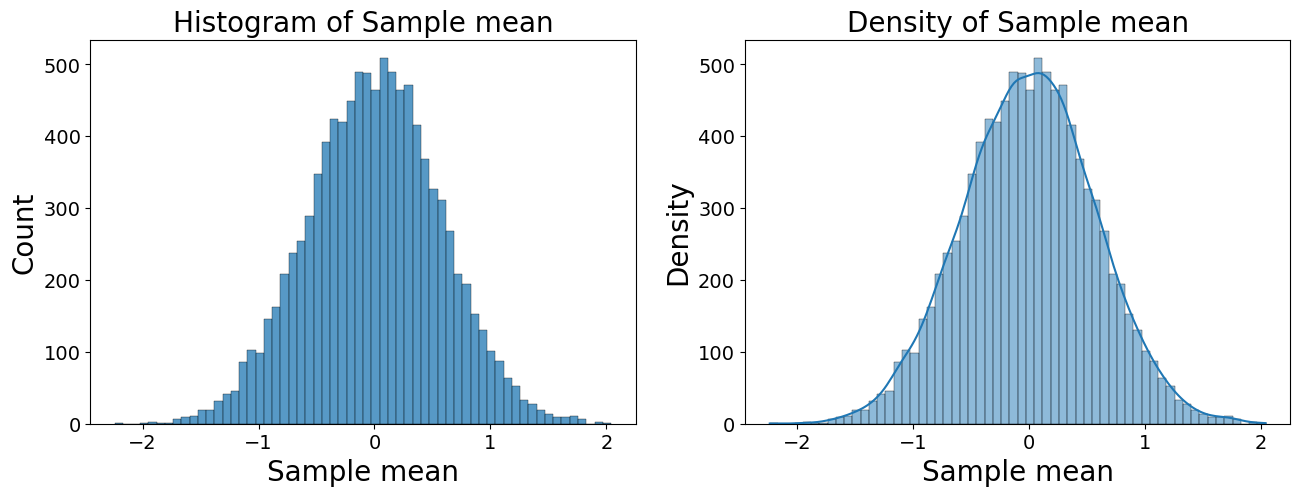

In [7]:
plot_with_size(100)

In [8]:
# Home work 1.2: Apply polynomial or nonlinear regression for data analysis by
# generating noisy points,
# using least square regression or pseudoinverse or optimize.curve_fit methods (on your choice)

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

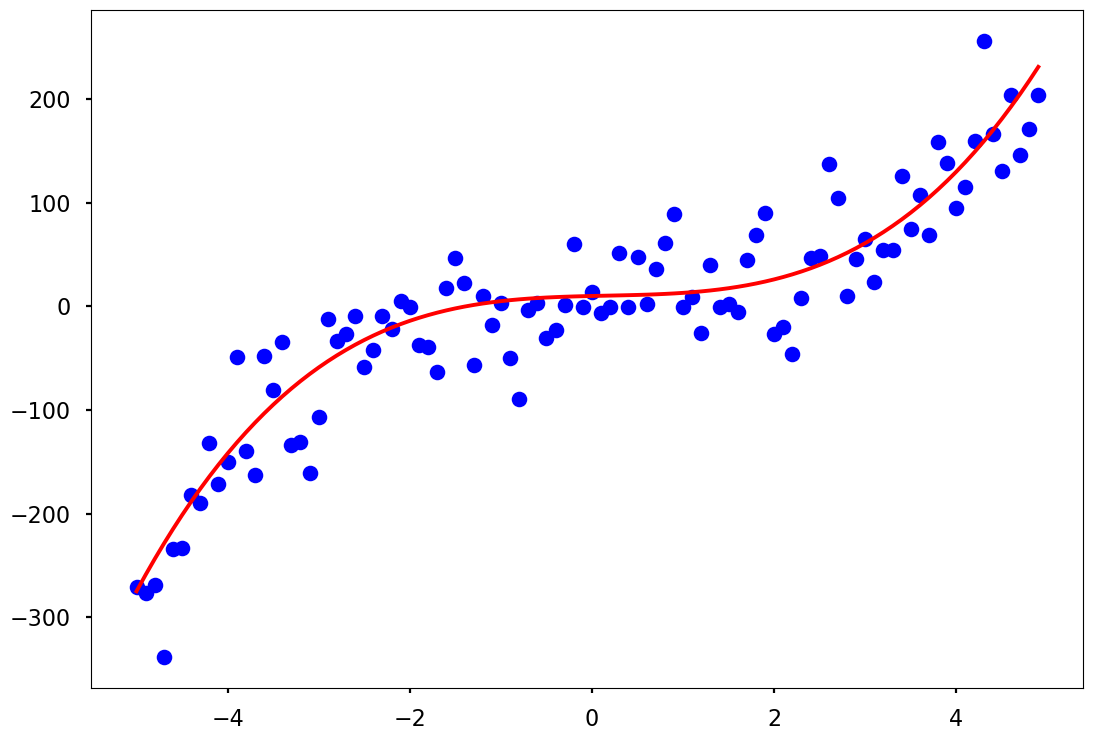

In [9]:
# generate x and y
x = np.arange(-5, 5, 0.1)
y = (2 * x**3) - x**2 + (2*x) + 10
noise = 40 * np.random.normal(size=x.size)
ydata = y + noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.show()

[ 0.93127647  1.56135934  2.46630284 -0.46767847]


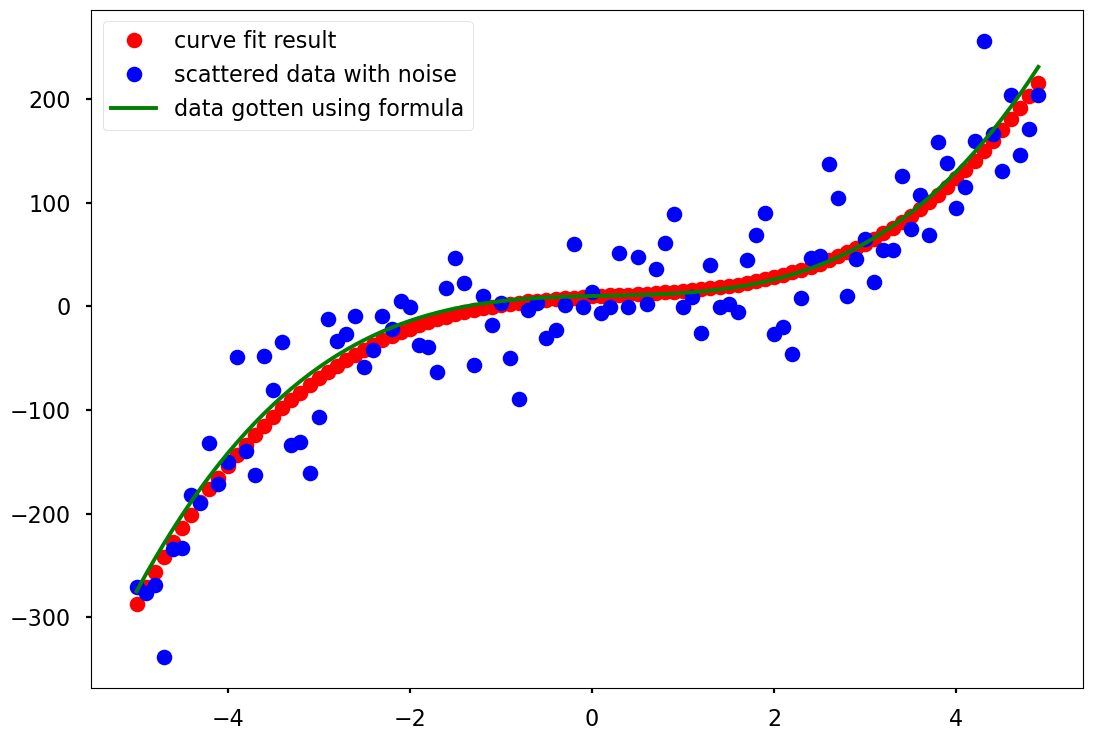

In [10]:
# solution using optimize.curve_fit
def func(x, a, b, c, d):
    return a * 2 * x**3  - b*x**2 + c*2*x + d + 10

coeff, cov = optimize.curve_fit(func,x, ydata)
print(coeff) # coefficients a,b,c,d
# curve fit optimization
plt.plot(x, func(x, coeff[0], coeff[1], coeff[2], coeff[3]), 'ro', label='curve fit result')
plt.plot(x, ydata, 'bo', label='scattered data with noise') # scattered data with noise
plt.plot(x, y, 'g', label='data gotten using formula')  # real data
plt.legend()
plt.show()

[[-5.00000000e+00  1.00000000e+00]
 [-4.90000000e+00  1.00000000e+00]
 [-4.80000000e+00  1.00000000e+00]
 [-4.70000000e+00  1.00000000e+00]
 [-4.60000000e+00  1.00000000e+00]
 [-4.50000000e+00  1.00000000e+00]
 [-4.40000000e+00  1.00000000e+00]
 [-4.30000000e+00  1.00000000e+00]
 [-4.20000000e+00  1.00000000e+00]
 [-4.10000000e+00  1.00000000e+00]
 [-4.00000000e+00  1.00000000e+00]
 [-3.90000000e+00  1.00000000e+00]
 [-3.80000000e+00  1.00000000e+00]
 [-3.70000000e+00  1.00000000e+00]
 [-3.60000000e+00  1.00000000e+00]
 [-3.50000000e+00  1.00000000e+00]
 [-3.40000000e+00  1.00000000e+00]
 [-3.30000000e+00  1.00000000e+00]
 [-3.20000000e+00  1.00000000e+00]
 [-3.10000000e+00  1.00000000e+00]
 [-3.00000000e+00  1.00000000e+00]
 [-2.90000000e+00  1.00000000e+00]
 [-2.80000000e+00  1.00000000e+00]
 [-2.70000000e+00  1.00000000e+00]
 [-2.60000000e+00  1.00000000e+00]
 [-2.50000000e+00  1.00000000e+00]
 [-2.40000000e+00  1.00000000e+00]
 [-2.30000000e+00  1.00000000e+00]
 [-2.20000000e+00  1

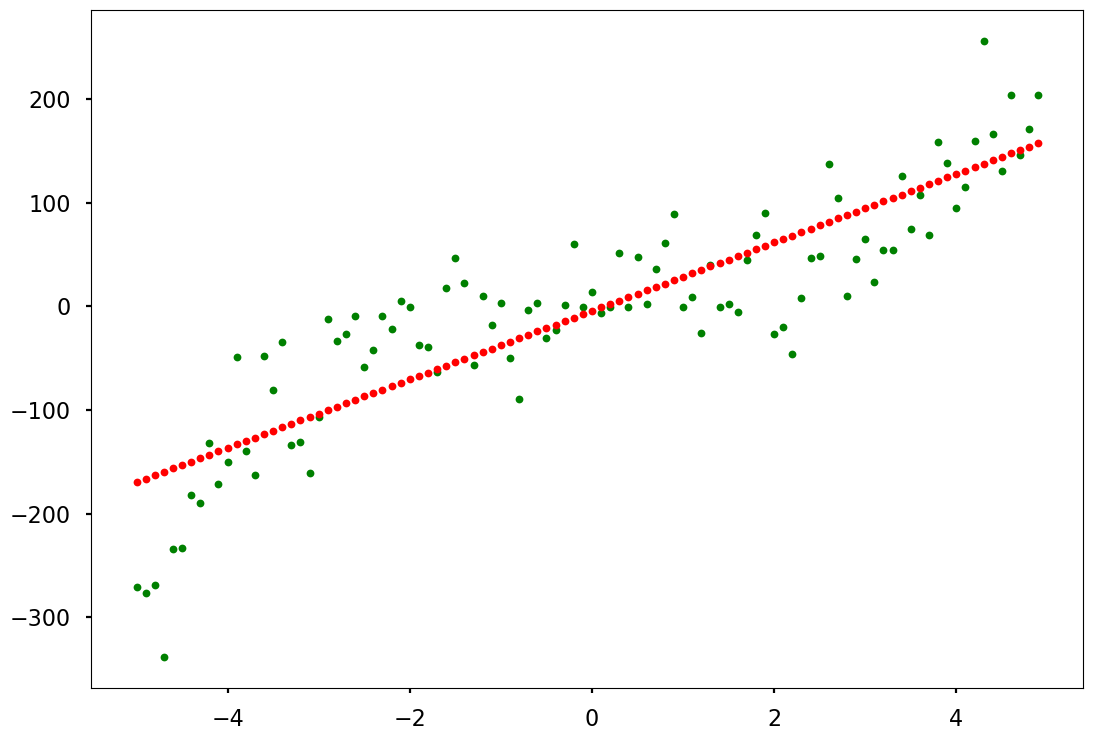

In [14]:
# using the least square regression method
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T
# turn y into a column vector
by = ydata[:, np.newaxis]
print(A)
# Direct least square regression
alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), ydata)
print(alpha)
# plot the results
plt.plot(x, ydata, 'g.')
plt.plot(x, alpha[0]*x + alpha[1], 'r.')
plt.show()

[[33.03448597]
 [-4.40470556]]


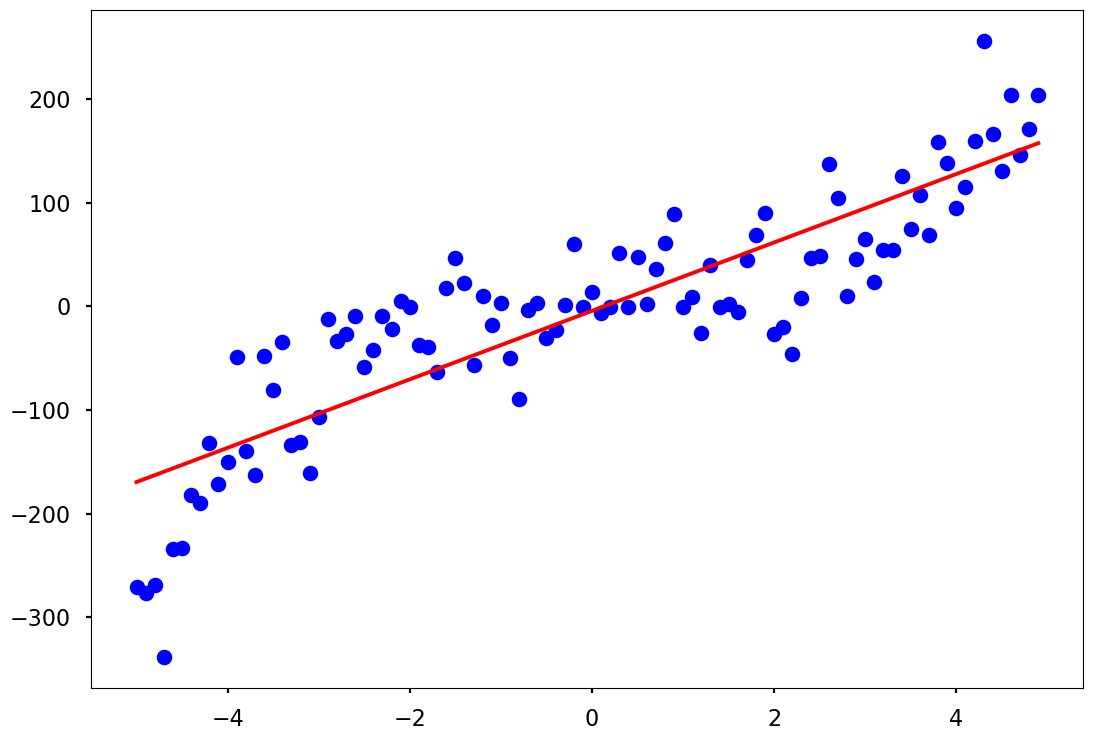

In [12]:
# using the pseudoinverse

pinv = np.linalg.pinv(A)
alpha = pinv.dot(by)
print(alpha)
plt.plot(x, ydata, 'bo')
plt.plot(x, alpha[0] * x + alpha[1], 'r')
plt.show()

In [13]:
np.linalg.lstsq(A, ydata, rcond=None)[0]

array([33.03448597, -4.40470556])